In [85]:
from tensorflow.keras.models import load_model
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt

In [86]:
classifier = load_model('Trained_model.h5')

In [87]:
test_set = 'mydata/test_set'
batch_size = 1000
img_height = 180
img_width = 180

testing_datagen = ImageDataGenerator(rescale=1. / 255)
testing_generator = testing_datagen.flow_from_directory(
test_set,
target_size=(64, 64),
batch_size=32,
shuffle=False,
class_mode='categorical')

y_pred_ohe = classifier.predict(testing_generator)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "d:\uc file\4 year 1 sem\individual project research\project\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-87-5a52b9f1ad65>", line 12, in <module>
    class_mode='categorical')
  File "d:\uc file\4 year 1 sem\individual project research\project\venv\lib\site-packages\tensorflow\python\keras\preprocessing\image.py", line 958, in flow_from_directory
    interpolation=interpolation)
  File "d:\uc file\4 year 1 sem\individual project research\project\venv\lib\site-packages\tensorflow\python\keras\preprocessing\image.py", line 396, in __init__
    **kwargs)
  File "d:\uc file\4 year 1 sem\individual project research\project\venv\lib\site-packages\keras_preprocessing\image\directory_iterator.py", line 135, in __init__
    classes, filenames = res.get()
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python36\lib\multiprocessing\pool.py"

TypeError: object of type 'NoneType' has no len()

In [ ]:
y_pred=list(y_pred_labels)
y_true=[]
for j in range(26):
    for i in range(250):
        y_true.append(j)

In [ ]:
col=list(testing_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm)

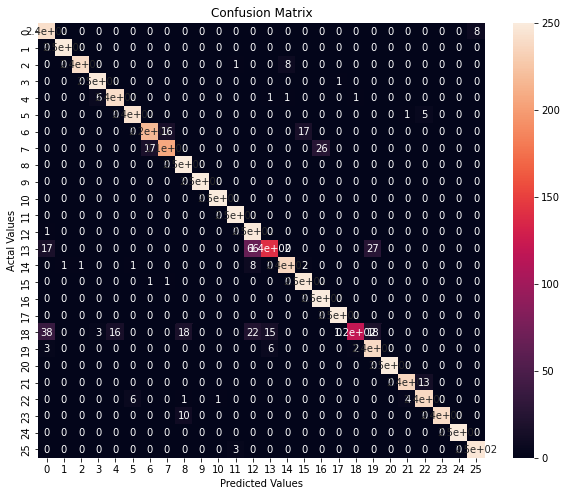

In [ ]:
#Plotting the confusion matrix

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()